# Actividad 1.1 (Extracción de Características)
- Miranda Eugenia Colorado Arróniz A01737027

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (1643872, 8)


#### **1. Aplicar acciones de preprocesamiento para reemplazar valores nulos y outliers del dataframe**

Vemos los primeros 5 registros del dataframe

In [2]:
print("\nPrimeras filas del dataframe:")
df.head()


Primeras filas del dataframe:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000


Revisamos las columnas y sus tipos de datos

In [3]:
print("\nNombre de las columnas y sus tipos de datos:")
df.dtypes


Nombre de las columnas y sus tipos de datos:


TaxonName                            object
TaxonCode                            object
SamplingOperations_code              object
CodeSite_SamplingOperations          object
Date_SamplingOperation               object
Abundance_nbcell                      int64
TotalAbundance_SamplingOperation      int64
Abundance_pm                        float64
dtype: object

Revisamos si hay valores nulos en el dataframe

In [4]:
print("\nNúmero de valores nulos por columna:")
df.isnull().sum()


Número de valores nulos por columna:


TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

Separamos columnas numéricas y categoricas

In [5]:
num_cols = df.select_dtypes(include=[np.number])
cat_cols = df.select_dtypes(include=['object'])

print("Columnas numéricas:", num_cols.columns.tolist())
print("Columnas categóricas:", cat_cols.columns.tolist())

Columnas numéricas: ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']
Columnas categóricas: ['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'CodeSite_SamplingOperations', 'Date_SamplingOperation']


Hacemos el procedimiento de IQR para eliminar valores atípicos


Valores nulos tras eliminar outliers (IQR):
TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64


<Figure size 1500x800 with 0 Axes>

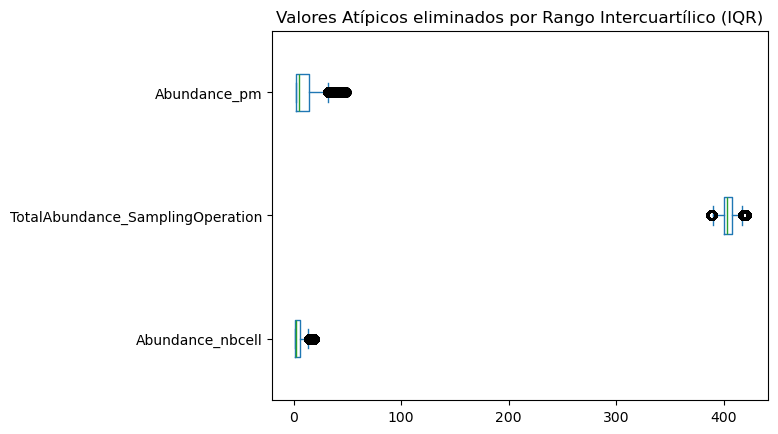

In [6]:
# Aplicamos IQR solo a columnas numéricas
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

limite_superior_iqr = Q3 + 1.5 * IQR
limite_inferior_iqr = Q1 - 1.5 * IQR

# Máscara para filas sin outliers
mask = ((num_cols <= limite_superior_iqr) & (num_cols >= limite_inferior_iqr)).all(axis=1)

# Aplicamos la máscara al dataframe completo
df_clean = df[mask].copy()

print("\nValores nulos tras eliminar outliers (IQR):")
print(df_clean.isnull().sum())

plt.figure(figsize=(15, 8))
df_clean.plot(kind='box', vert=False)
plt.title("Valores Atípicos eliminados por Rango Intercuartílico (IQR)")
plt.show()

#### **2. Extraer características a partir de aplicar un análisis univariado, a diferentes variables categóricas: TaxonName, TaxonCode, SamplingOperations_code, Date_SamplingOperation. Mostrar los resultados obtenidos ,mediante gráficas y tablas**

#### *Variable: "TaxonName"*

Hacemos el análisis univariado de la variables categórica "TaxonName"

In [7]:
Tabla_freq1 = df_clean['TaxonName'].value_counts().reset_index()
Tabla_freq1

,TaxonName,count
0,Nitzschia dissipata,26458
1,Navicula permitis,23557
2,Achnanthes lanceolata,23285
3,Sellaphora nigri,23248
4,Cocconeis euglypta,22994
...,...,...
2242,Lindavia comta,1
2243,Nitzschia actinastroides,1
2244,Pinnularia thermalis,1
2245,Lindavia bodanica,1


Hacemos un filtro de los valores más relevantes en los registros de "TaxonName"

In [8]:
Filtro1 = Tabla_freq1[Tabla_freq1['count'] > 19650]
Filtro1

,TaxonName,count
0,Nitzschia dissipata,26458
1,Navicula permitis,23557
2,Achnanthes lanceolata,23285
3,Sellaphora nigri,23248
4,Cocconeis euglypta,22994
5,Nitzschia palea,22742
6,Gomphonema parvulum,22406
7,Vibrio tripunctatus,21705
8,Navicula gregaria,21140
9,Rhoicosphenia abbreviata,21036


Ajustamos el indice del dataframe

In [9]:
Filtro_index1= Filtro1.set_index('TaxonName')
Filtro_index1

,count
TaxonName,
Nitzschia dissipata,26458
Navicula permitis,23557
Achnanthes lanceolata,23285
Sellaphora nigri,23248
Cocconeis euglypta,22994
Nitzschia palea,22742
Gomphonema parvulum,22406
Vibrio tripunctatus,21705
Navicula gregaria,21140


#### *Variable: "TaxonCode"*

Hacemos el análisis univariado de la variables categórica "TaxonCode"

In [10]:
Tabla_freq2 = df_clean['TaxonCode'].value_counts().reset_index()
Tabla_freq2

,TaxonCode,count
0,Nitdi04,26458
1,Navpe05,23557
2,Achla02,23285
3,Selni01,23248
4,Coceu01,22994
...,...,...
2242,Linco01,1
2243,Nitac06,1
2244,Pinth01,1
2245,Linbo01,1


Hacemos un filtro de los valores más relevantes en los registros de "TaxonCode"

In [11]:
Filtro2 = Tabla_freq2[Tabla_freq2['count'] > 19650]
Filtro2

,TaxonCode,count
0,Nitdi04,26458
1,Navpe05,23557
2,Achla02,23285
3,Selni01,23248
4,Coceu01,22994
5,Nitpa01,22742
6,Gompa06,22406
7,Vibtr01,21705
8,Navgr01,21140
9,Rhoab01,21036


Ajustamos el indice del dataframe

In [12]:
Filtro_index2 = Filtro2.set_index('TaxonCode')
Filtro_index2

,count
TaxonCode,
Nitdi04,26458
Navpe05,23557
Achla02,23285
Selni01,23248
Coceu01,22994
Nitpa01,22742
Gompa06,22406
Vibtr01,21705
Navgr01,21140


#### *Variable: SamplingOperations_code*

Hacemos el análisis univariado de la variables categórica "SamplingOperations_code"

In [13]:
Tabla_freq3 = df_clean['SamplingOperations_code'].value_counts().reset_index()
Tabla_freq3

,SamplingOperations_code,count
0,S05051000_20080722,94
1,S05068700_20070904,92
2,S05119000_20160627,91
3,S04304002_20200907,89
4,S03132260_20120718,86
...,...,...
46619,S06119950_20120607,1
46620,S05029820_20180605,1
46621,S06159385_20110720,1
46622,S03113140_20150608,1


Hacemos un filtro de los valores más relevantes en los registros de "SamplingOperations_code"

In [14]:
Filtro3 = Tabla_freq3[Tabla_freq3['count'] > 82]
Filtro3

,SamplingOperations_code,count
0,S05051000_20080722,94
1,S05068700_20070904,92
2,S05119000_20160627,91
3,S04304002_20200907,89
4,S03132260_20120718,86
5,S05119000_20170613,86
6,S04215520_20200702,86
7,S04097550_20180807,84
8,S04473008_20160711,84
9,S02044100_20070910,83


Ajustamos el indice del dataframe

In [15]:
Filtro_index3 = Filtro3.set_index('SamplingOperations_code')
Filtro_index3

,count
SamplingOperations_code,
S05051000_20080722,94
S05068700_20070904,92
S05119000_20160627,91
S04304002_20200907,89
S03132260_20120718,86
S05119000_20170613,86
S04215520_20200702,86
S04097550_20180807,84
S04473008_20160711,84


#### *Variable: "Date_SamplingOperation"*

Hacemos el análisis univariado de la variables categórica "Date_SamplingOperation"

In [16]:
Tabla_freq4 = df_clean['Date_SamplingOperation'].value_counts().reset_index()
Tabla_freq4

,Date_SamplingOperation,count
0,2013-07-11,3812
1,2013-07-16,3809
2,2015-07-08,3720
3,2018-07-17,3573
4,2013-07-17,3542
...,...,...
2192,2022-02-07,6
2193,2014-02-24,5
2194,2015-02-12,5
2195,2013-06-15,4


Hacemos un filtro de los valores más relevantes en los registros de "Date_SamplingOperation"

In [17]:
Filtro4 = Tabla_freq4[Tabla_freq4['count'] > 3053]
Filtro4

,Date_SamplingOperation,count
0,2013-07-11,3812
1,2013-07-16,3809
2,2015-07-08,3720
3,2018-07-17,3573
4,2013-07-17,3542
5,2015-06-24,3352
6,2016-07-21,3168
7,2016-07-20,3162
8,2012-07-25,3104
9,2020-07-09,3091


Ajustamos el indice del dataframe

In [18]:
Filtro_index4= Filtro4.set_index('Date_SamplingOperation')
Filtro_index4

,count
Date_SamplingOperation,
2013-07-11,3812
2013-07-16,3809
2015-07-08,3720
2018-07-17,3573
2013-07-17,3542
2015-06-24,3352
2016-07-21,3168
2016-07-20,3162
2012-07-25,3104


Hacemos gráficas de barras de las 4 variables categóricas

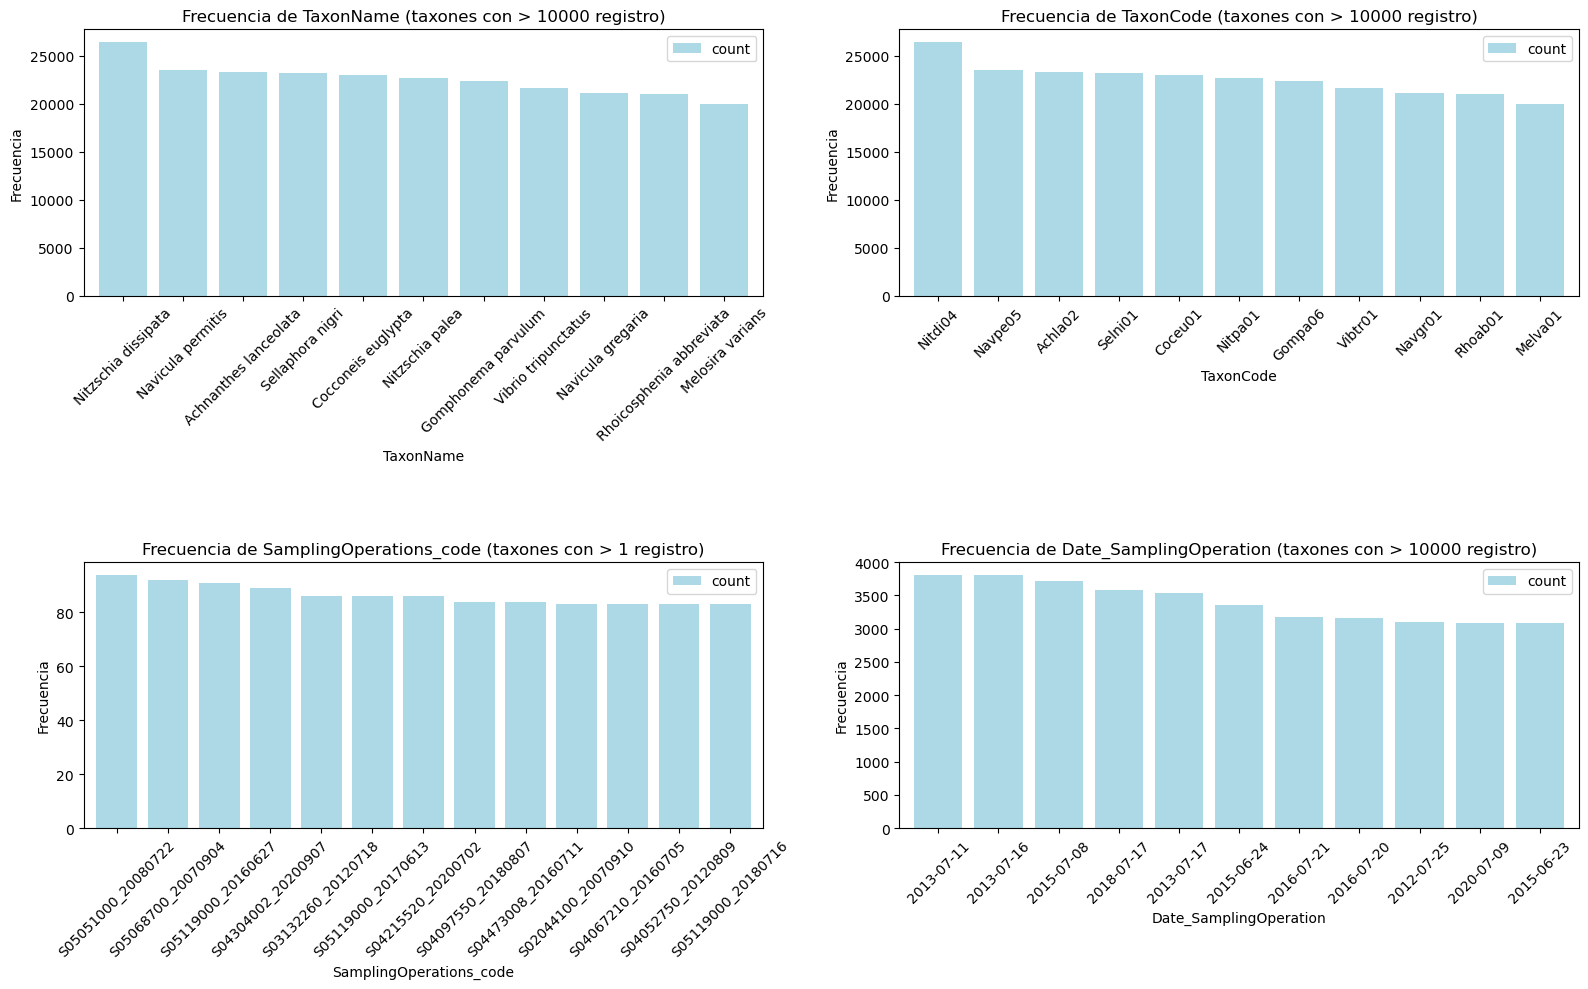

In [19]:

def plot_tablas(tablas, nombres, tipo_filtro):
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))
    axs = axs.flatten()
    for i, (tabla, nombre) in enumerate(zip(tablas, nombres)):
        tabla.plot(kind='bar', width=0.8, color='lightblue', ax=axs[i])
        axs[i].set_title(f'Frecuencia de {nombre} ({tipo_filtro[i]})')
        axs[i].set_xlabel(nombre)
        axs[i].set_ylabel('Frecuencia')
        axs[i].tick_params(axis='x', labelrotation=45)
        axs[i].legend(['count'])
    plt.tight_layout()
    plt.subplots_adjust(hspace=1, wspace=0.2)
    plt.show()

plot_tablas(
    [Filtro_index1, Filtro_index2, Filtro_index3, Filtro_index4],
    ['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'Date_SamplingOperation'],
    [
        'taxones con > 10000 registro',
        'taxones con > 10000 registro',
        'taxones con > 1 registro',
        'taxones con > 10000 registro'
    ]
)

#### **3. Categorizar las siguientes variables: ”Abundance_nbcell”, “TotalAbundance_SamplingOperation”, “Abundance_pm”, aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.**

#### *Variable: "Abundance_nbcell"*

Determinamos la cantidad de clases para los datos agrupados

In [20]:
#Calculamos el numero total de la población "n"
df_clean['Abundance_nbcell'].info()
n_1 = 171

<class 'pandas.core.series.Series'>
Index: 1341160 entries, 0 to 1643871
Series name: Abundance_nbcell
Non-Null Count    Dtype
--------------    -----
1341160 non-null  int64
dtypes: int64(1)
memory usage: 20.5 MB


Obtenemos el limite superior e inferior de la columna objetivo

In [21]:
Max_1 = df_clean['Abundance_nbcell'].max()
Min_1 = df_clean['Abundance_nbcell'].min()
Limites_1 = [Min_1, Max_1]
Limites_1

[1, 19]

Calculamos el rango R

In [22]:
R_1 = Max_1 - Min_1
R_1

18

Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges

In [23]:
ni_1 = 1 + 3.32 * np.log10(n_1)
ni_1

np.float64(8.41354708650195)

Calculamos el Ancho del Intervalo "i"

In [24]:
i_1 = R_1 / ni_1
i_1

np.float64(2.1394068179493306)

Creamos las categorías a partir de las clases obtenidas

In [25]:
intervalos_1 = np.linspace(0.9, 19.1, 9) # Agregamos los datos que obtuvimos en el análisis
intervalos_1

array([ 0.9  ,  3.175,  5.45 ,  7.725, 10.   , 12.275, 14.55 , 16.825,
       19.1  ])

In [26]:
categorias_1 = ["Categoría 1", "Categoría 2","Categoría 3", "Categoría 4",
             "Categoría 5", "Categoría 6","Categoría 7", "Categoría 8"]

In [27]:
df_clean['Abundance_nbcell'] = pd.cut(x = df_clean['Abundance_nbcell'], bins = intervalos_1, labels = categorias_1)
df_clean['Abundance_nbcell']

0          Categoría 4
1          Categoría 1
2          Categoría 1
3          Categoría 1
4          Categoría 1
              ...     
1643867    Categoría 1
1643868    Categoría 1
1643869    Categoría 1
1643870    Categoría 3
1643871    Categoría 1
Name: Abundance_nbcell, Length: 1341160, dtype: category
Categories (8, object): ['Categoría 1' < 'Categoría 2' < 'Categoría 3' < 'Categoría 4' < 'Categoría 5' < 'Categoría 6' < 'Categoría 7' < 'Categoría 8']

Obtener el análisis univariado de "Abundance_nbcell"

In [28]:
Tabla_freq5 = df_clean['Abundance_nbcell'].value_counts().reset_index()
Tabla_freq5

,Abundance_nbcell,count
0,Categoría 1,819633
1,Categoría 2,183364
2,Categoría 3,104409
3,Categoría 4,98038
4,Categoría 5,43197
5,Categoría 6,33583
6,Categoría 8,31654
7,Categoría 7,27282


In [29]:
Filtro5 = Tabla_freq5[Tabla_freq5['count'] > 0]
Filtro5

,Abundance_nbcell,count
0,Categoría 1,819633
1,Categoría 2,183364
2,Categoría 3,104409
3,Categoría 4,98038
4,Categoría 5,43197
5,Categoría 6,33583
6,Categoría 8,31654
7,Categoría 7,27282


In [30]:
Filtro_index5 = Filtro5.set_index('Abundance_nbcell')
Filtro_index5 

,count
Abundance_nbcell,
Categoría 1,819633
Categoría 2,183364
Categoría 3,104409
Categoría 4,98038
Categoría 5,43197
Categoría 6,33583
Categoría 8,31654
Categoría 7,27282


#### *Variable: "TotalAbundance_SamplingOperation"*

Determinamos la cantidad de clases para los datos agrupados

In [31]:
#Calculamos el numero total de la población "n"
df_clean['TotalAbundance_SamplingOperation'].info()
n_2 = 171

<class 'pandas.core.series.Series'>
Index: 1341160 entries, 0 to 1643871
Series name: TotalAbundance_SamplingOperation
Non-Null Count    Dtype
--------------    -----
1341160 non-null  int64
dtypes: int64(1)
memory usage: 20.5 MB


Obtenemos el limite superior e inferior de la columna objetivo

In [32]:
Max_2 = df_clean['TotalAbundance_SamplingOperation'].max()
Min_2 = df_clean['TotalAbundance_SamplingOperation'].min()
Limites_2 = [Min_2, Max_2]
Limites_2

[388, 420]

Calculamos el rango R

In [33]:
R_2 = Max_2 - Min_2
R_2

32

Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges

In [34]:
ni_2 = 1 + 3.32 * np.log10(n_2)
ni_2

np.float64(8.41354708650195)

Calculamos el Ancho del Intervalo "i"

In [35]:
i_2 = R_2 / ni_2
i_2

np.float64(3.803389898576588)

Creamos las categorías a partir de las clases obtenidas

In [36]:
intervalos_2 = np.linspace(387.9, 420.1, 9) # Agregamos los datos que obtuvimos en el análisis
intervalos_2

array([387.9  , 391.925, 395.95 , 399.975, 404.   , 408.025, 412.05 ,
       416.075, 420.1  ])

In [37]:
categorias_2 = ["Categoría 1", "Categoría 2","Categoría 3", "Categoría 4",
             "Categoría 5", "Categoría 6","Categoría 7", "Categoría 8"]

In [38]:
df_clean['TotalAbundance_SamplingOperation'] = pd.cut(x = df_clean['TotalAbundance_SamplingOperation'], bins = intervalos_2, labels = categorias_2)
df_clean['TotalAbundance_SamplingOperation']

0          Categoría 8
1          Categoría 4
2          Categoría 4
3          Categoría 4
4          Categoría 4
              ...     
1643867    Categoría 6
1643868    Categoría 4
1643869    Categoría 4
1643870    Categoría 4
1643871    Categoría 4
Name: TotalAbundance_SamplingOperation, Length: 1341160, dtype: category
Categories (8, object): ['Categoría 1' < 'Categoría 2' < 'Categoría 3' < 'Categoría 4' < 'Categoría 5' < 'Categoría 6' < 'Categoría 7' < 'Categoría 8']

Obtener el análisis univariado de "Abundance_nbcell"

In [39]:
Tabla_freq6 = df_clean['TotalAbundance_SamplingOperation'].value_counts().reset_index()
Tabla_freq6

,TotalAbundance_SamplingOperation,count
0,Categoría 4,728705
1,Categoría 5,254118
2,Categoría 6,144840
3,Categoría 7,76820
4,Categoría 8,64184
5,Categoría 3,56309
6,Categoría 2,11495
7,Categoría 1,4689


In [40]:
Filtro6 = Tabla_freq6[Tabla_freq6['count'] > 0]
Filtro6

,TotalAbundance_SamplingOperation,count
0,Categoría 4,728705
1,Categoría 5,254118
2,Categoría 6,144840
3,Categoría 7,76820
4,Categoría 8,64184
5,Categoría 3,56309
6,Categoría 2,11495
7,Categoría 1,4689


In [41]:
Filtro_index6 = Filtro6.set_index('TotalAbundance_SamplingOperation')
Filtro_index6

,count
TotalAbundance_SamplingOperation,
Categoría 4,728705
Categoría 5,254118
Categoría 6,144840
Categoría 7,76820
Categoría 8,64184
Categoría 3,56309
Categoría 2,11495
Categoría 1,4689


#### *Variable: "Abundance_pm"*

Determinamos la cantidad de clases para los datos agrupados

In [42]:
#Calculamos el numero total de la población "n"
df_clean['Abundance_pm'].info()
n_3 = 171

<class 'pandas.core.series.Series'>
Index: 1341160 entries, 0 to 1643871
Series name: Abundance_pm
Non-Null Count    Dtype  
--------------    -----  
1341160 non-null  float64
dtypes: float64(1)
memory usage: 20.5 MB


Obtenemos el limite superior e inferior de la columna objetivo

In [43]:
Max_3 = df_clean['Abundance_pm'].max()
Min_3 = df_clean['Abundance_pm'].min()
Limites_3 = [Min_3, Max_3]
Limites_3

[2.38095238095238, 48.84318766066838]

Calculamos el rango R

In [44]:
R_3 = Max_3 - Min_3
R_3

46.462235279716

Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges

In [45]:
ni_3 = 1 + 3.32 * np.log10(n_3)
ni_3

np.float64(8.41354708650195)

Calculamos el Ancho del Intervalo "i"

In [46]:
i_3 = R_3 / ni_3
i_3

np.float64(5.522312385255018)

Creamos las categorías a partir de las clases obtenidas

In [47]:
intervalos_3 = np.linspace(2.28095238095, 48.9431876607, 9) # Agregamos los datos que obtuvimos en el análisis
intervalos_3

array([ 2.28095238,  8.11373179, 13.9465112 , 19.77929061, 25.61207002,
       31.44484943, 37.27762884, 43.11040825, 48.94318766])

In [48]:
categorias_3 = ["Categoría 1", "Categoría 2","Categoría 3", "Categoría 4",
             "Categoría 5", "Categoría 6","Categoría 7", "Categoría 8"]

In [49]:
df_clean['Abundance_pm'] = pd.cut(x = df_clean['Abundance_pm'], bins = intervalos_3, labels = categorias_3)
df_clean['Abundance_pm']

0          Categoría 3
1          Categoría 1
2          Categoría 1
3          Categoría 1
4          Categoría 1
              ...     
1643867    Categoría 1
1643868    Categoría 1
1643869    Categoría 1
1643870    Categoría 3
1643871    Categoría 1
Name: Abundance_pm, Length: 1341160, dtype: category
Categories (8, object): ['Categoría 1' < 'Categoría 2' < 'Categoría 3' < 'Categoría 4' < 'Categoría 5' < 'Categoría 6' < 'Categoría 7' < 'Categoría 8']

Obtener el análisis univariado de "Abundance_nbcell"

In [50]:
Tabla_freq7 = df_clean['Abundance_pm'].value_counts().reset_index()
Tabla_freq7

,Abundance_pm,count
0,Categoría 1,819633
1,Categoría 2,183364
2,Categoría 3,120745
3,Categoría 4,81632
4,Categoría 5,44696
5,Categoría 6,39580
6,Categoría 7,31377
7,Categoría 8,20133


In [51]:
Filtro7 = Tabla_freq7[Tabla_freq7['count'] > 0]
Filtro7

,Abundance_pm,count
0,Categoría 1,819633
1,Categoría 2,183364
2,Categoría 3,120745
3,Categoría 4,81632
4,Categoría 5,44696
5,Categoría 6,39580
6,Categoría 7,31377
7,Categoría 8,20133


In [52]:
Filtro_index7 = Filtro7.set_index('Abundance_pm')
Filtro_index7

,count
Abundance_pm,
Categoría 1,819633
Categoría 2,183364
Categoría 3,120745
Categoría 4,81632
Categoría 5,44696
Categoría 6,39580
Categoría 7,31377
Categoría 8,20133


Hacemos las gráficas de barras de las variables numéricas categorizadas

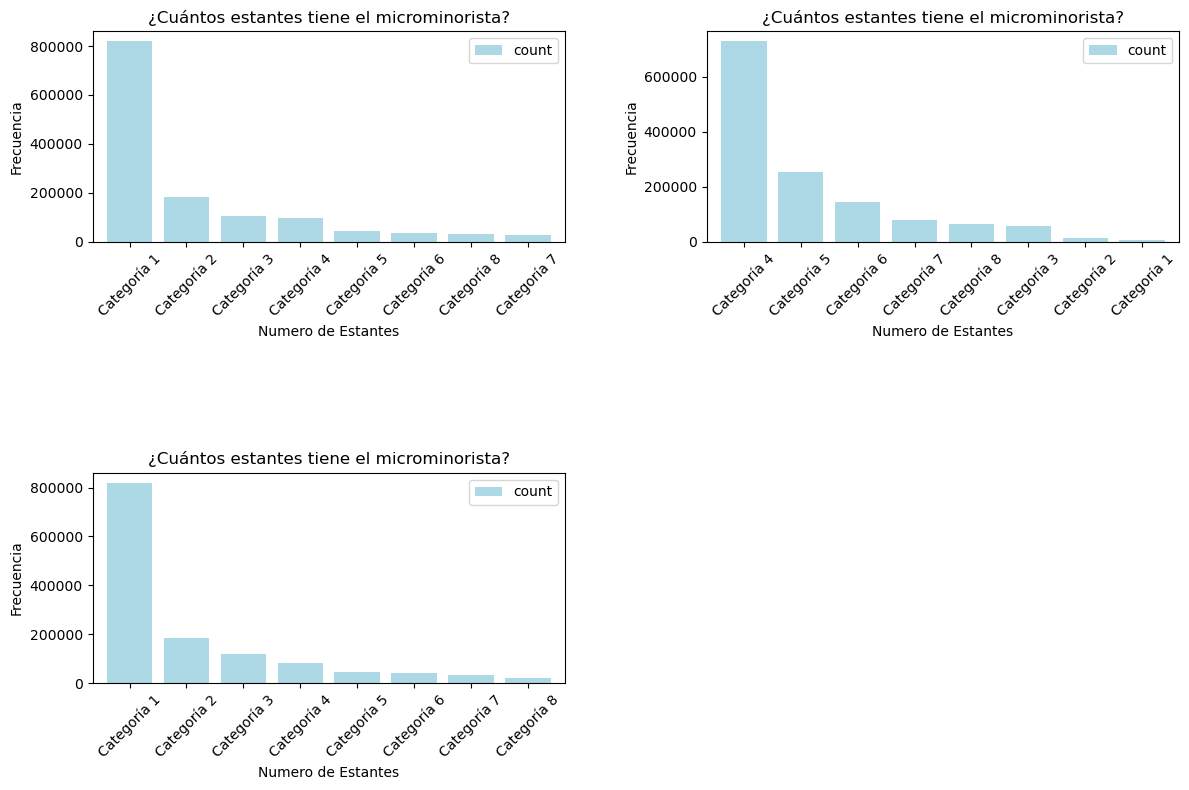

In [53]:
def plot_tablas(tablas, titulo, xlabel, ylabel, color="lightblue"):
    n = len(tablas)
    cols = 2 if n <= 4 else 3
    rows = (n + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axs = axs.flatten()
    for i, tabla in enumerate(tablas):
        tabla.plot(kind='bar', width=0.8, color=color, ax=axs[i], rot=45)
        axs[i].set_title(titulo)
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
    # Oculta los ejes vacíos si hay menos tablas que subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    plt.tight_layout()
    plt.subplots_adjust(hspace=1.1, wspace=0.3)
    plt.show()

plot_tablas(
    [Filtro_index5, Filtro_index6, Filtro_index7],
    '¿Cuántos estantes tiene el microminorista?',
    'Numero de Estantes',
    'Frecuencia'
)